In [1]:
### Common imports
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import math

### Custom functions
from src.rbm import RBM
from src.dbn import DBN
from src.dnn import DNN
from src.data import get_binaryalphadigts

In [2]:
keys_to_idx, idx_to_keys, key_to_set = get_binaryalphadigts()
raw_shape = (20, 16)
X_ordered = np.concatenate(list(key_to_set.values()))
labels = [np.ones(key_to_set[keys_to_idx[key]].shape[0], dtype=int)*key for key in range(36)]
y_ordered = np.concatenate(labels)
y_one_hot = np.zeros((y_ordered.size, y_ordered.max()+1))
y_one_hot[np.arange(y_ordered.size), y_ordered] = 1
X_train, X_test, y_train, y_test = train_test_split(
                                        X_ordered,
                                        y_one_hot,
                                        test_size=0.25,
                                        shuffle=True,)

## Restricted Boltzman Machine

### All data

In [3]:
cfg_train = {
    "n_epoches":1000,
    "lr":0.1,
    "batch_size":64,
    "shuffle":True
}

cfg_gibbs = {
    "n_images":9,
    "n_iters":1000,
}

cfg_dbn = {
    "channels":[320, 64]
}

cfg_dnn = {
    "channels":[320, 64],
    "n_classes":36
}

cfg_rbm = {
    "in_channels":320, 
    "out_channels":64,
}

In [4]:
rbm = RBM(**cfg_rbm)
losses_rbm=[]
losses_rbm.extend(rbm.train_RBM(X_train, **cfg_train))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [5]:
output = rbm.sample_Gibbs(**cfg_gibbs).reshape(-1, *raw_shape)

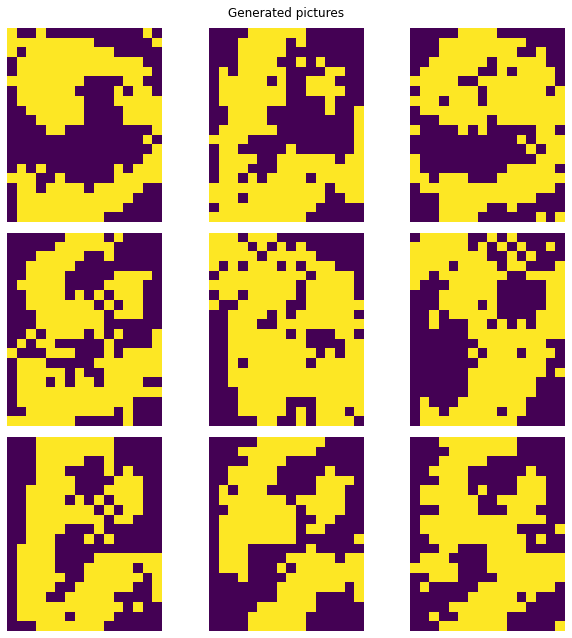

In [6]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(9, 9))
plt.suptitle("Generated pictures")
for i in range(3):
    axs[i, 0].imshow(output[i*3+0])
    axs[i, 0].axis("off")
    
    axs[i, 1].imshow(output[i*3+1])
    axs[i, 1].axis("off")
    
    axs[i, 2].imshow(output[i*3+2])
    axs[i, 2].axis("off")
    
plt.tight_layout()
plt.show()

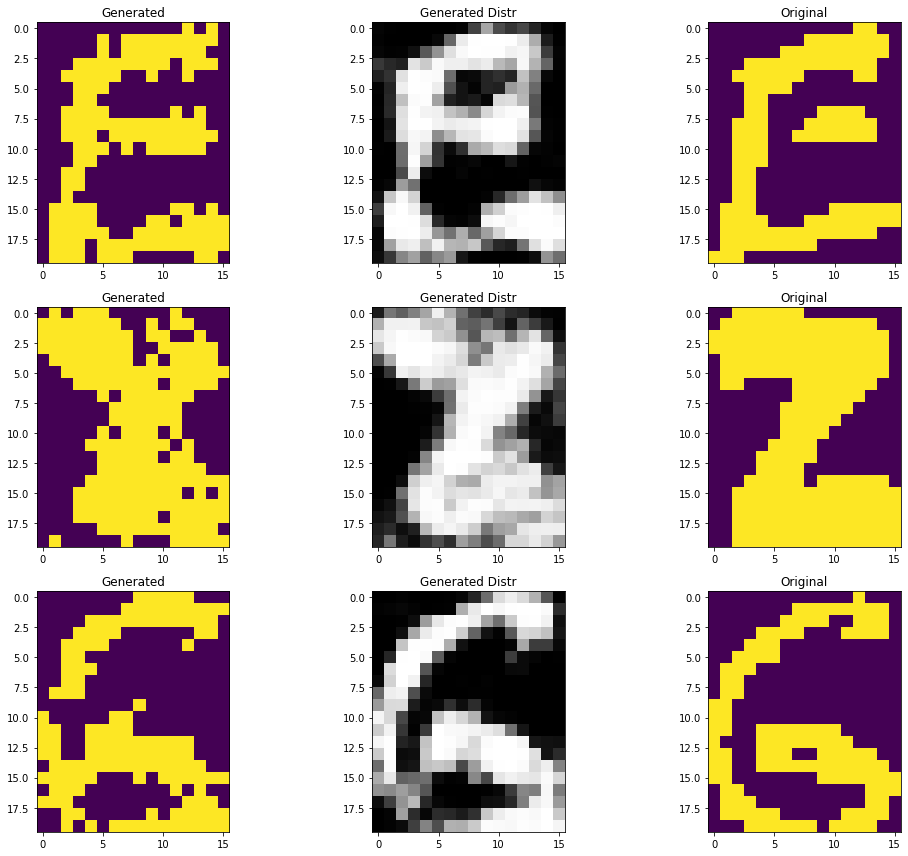

In [7]:
g = rbm.sample_from_data(X_test).reshape(-1, *raw_shape)
p_h = rbm.forward(X_test)
sample_h = np.random.uniform(0, 1, p_h.shape)
h = (sample_h < p_h).astype(int)
p_g = rbm.backward(h).reshape(-1, *raw_shape)

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 12))
for i in range(3):
    idx = np.random.randint(0, len(g)-1)
    axs[i, 0].imshow(g[idx])
    axs[i, 0].set_title("Generated")

    axs[i, 1].imshow(p_g[idx], "gray")
    axs[i, 1].set_title("Generated Distr")

    axs[i, 2].imshow(X_test[idx].reshape(raw_shape))
    axs[i, 2].set_title("Original")

plt.tight_layout()
plt.show()

### Train on one character

In [8]:
key = "2"
X_ = key_to_set[key]
rbm_ = RBM(**cfg_rbm)
losses_=[]
losses_.extend(rbm_.train_RBM(X_, **cfg_train))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [9]:
cfg_gibbs = {
    "n_images":15,
    "n_iters":1000,
}
output = rbm_.sample_Gibbs(**cfg_gibbs).reshape(-1, *raw_shape)

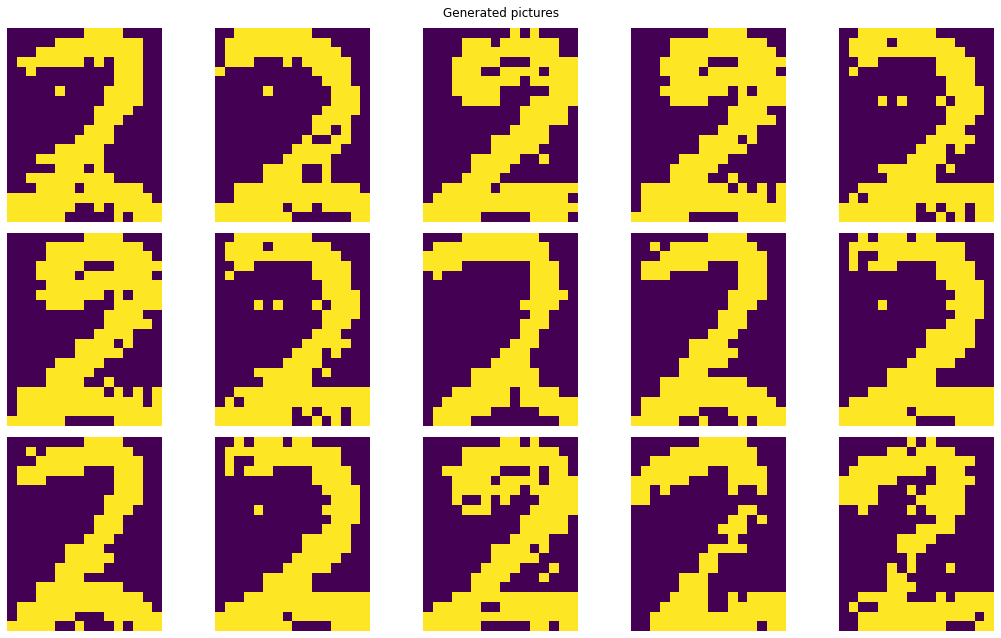

In [10]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(15, 9))
plt.suptitle("Generated pictures")
for i in range(3):
    axs[i, 0].imshow(output[i*3+0])
    axs[i, 0].axis("off")
    
    axs[i, 1].imshow(output[i*3+1])
    axs[i, 1].axis("off")
    
    axs[i, 2].imshow(output[i*3+2])
    axs[i, 2].axis("off")
        
    axs[i, 3].imshow(output[i*3+3])
    axs[i, 3].axis("off")    
    
    axs[i, 4].imshow(output[i*3+4])
    axs[i, 4].axis("off")
plt.tight_layout()
plt.show()

## Deep Belief Network
### All points

In [11]:
cfg_dbn = {
    "channels":[320, 64, 64]
}

cfg_train = {
    "n_epoches":100,
    "lr":0.1,
    "batch_size":128,
    "shuffle":True
}

cfg_gibbs = {
    "n_images":15,
    "n_iters":100,
}

In [12]:
dbn = DBN(**cfg_dbn)
losses_dbn = dbn.train_DBN(X_train, **cfg_train)

  0%|          | 0/100 [00:00<?, ?it/s]

In [13]:
output = dbn.sample_Gibbs(**cfg_gibbs).reshape(-1, *raw_shape)

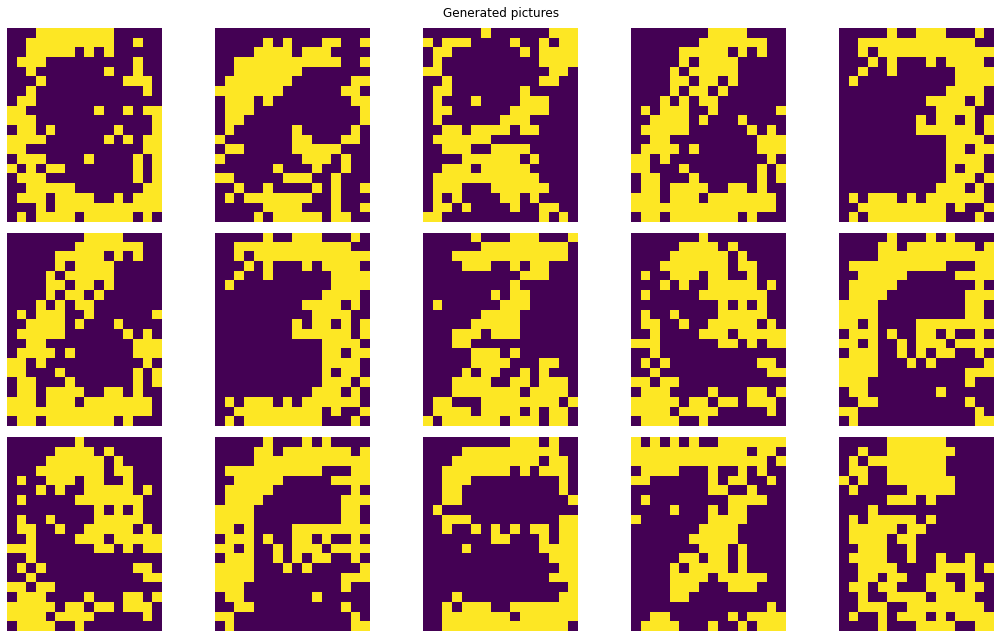

In [14]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(15, 9))
plt.suptitle("Generated pictures")
for i in range(3):
    axs[i, 0].imshow(output[i*3+0])
    axs[i, 0].axis("off")
    
    axs[i, 1].imshow(output[i*3+1])
    axs[i, 1].axis("off")
    
    axs[i, 2].imshow(output[i*3+2])
    axs[i, 2].axis("off")
        
    axs[i, 3].imshow(output[i*3+3])
    axs[i, 3].axis("off")    
    
    axs[i, 4].imshow(output[i*3+4])
    axs[i, 4].axis("off")
plt.tight_layout()
plt.show()

### One type

In [15]:
key = "2"
X_ = key_to_set[key]
dbn_ = DBN(**cfg_dbn)
losses_dbn_ = dbn_.train_DBN(X_, **cfg_train)

  0%|          | 0/100 [00:00<?, ?it/s]

In [16]:
cfg_gibbs = {
    "n_images":15,
    "n_iters":100,
}

output = dbn_.sample_Gibbs(**cfg_gibbs).reshape(-1, *raw_shape)

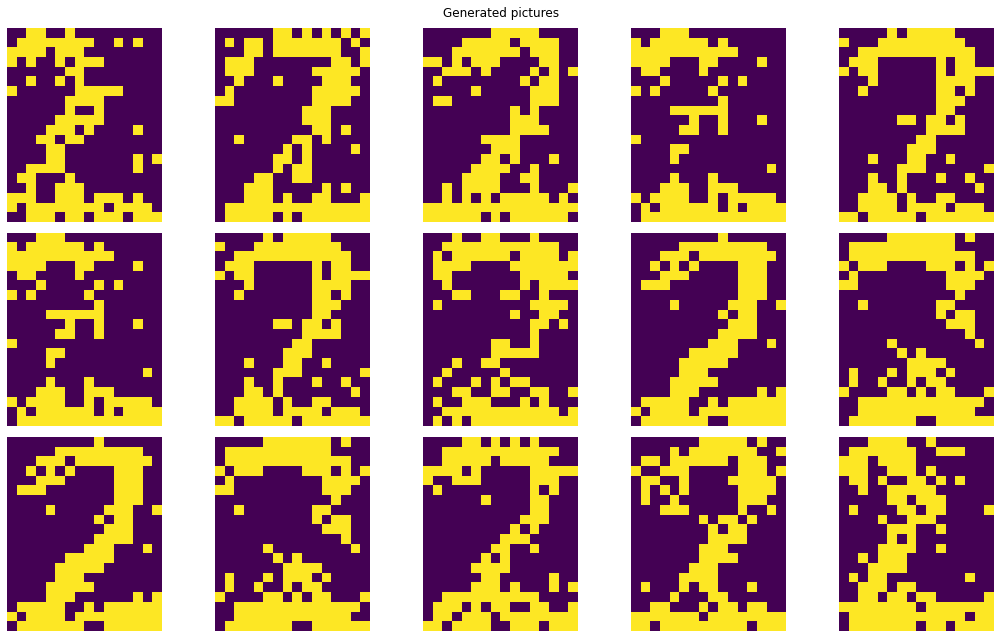

In [17]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(15, 9))
plt.suptitle("Generated pictures")
for i in range(3):
    axs[i, 0].imshow(output[i*3+0])
    axs[i, 0].axis("off")
    
    axs[i, 1].imshow(output[i*3+1])
    axs[i, 1].axis("off")
    
    axs[i, 2].imshow(output[i*3+2])
    axs[i, 2].axis("off")
        
    axs[i, 3].imshow(output[i*3+3])
    axs[i, 3].axis("off")    
    
    axs[i, 4].imshow(output[i*3+4])
    axs[i, 4].axis("off")
plt.tight_layout()
plt.show()

### DNN

### Without pre-training

In [18]:
cfg_train = {
    "n_epoches":1000,
    "lr":1,
    "batch_size":64,
    "shuffle":True
}

cfg_dnn = {
    "channels":[320, 20],
    "n_classes":36
}

In [19]:
dnn = DNN(**cfg_dnn)

In [20]:
dnn.forward(X_train)
losses = dnn.backprop(X_train, y_train, ** cfg_train)

  0%|          | 0/1000 [00:00<?, ?it/s]

### With pre-training

In [21]:
dnn_p = DNN(**cfg_dnn)
losses_p = dnn_p.train_DBN(X_train, 1000, 0.1, 64, True)
losses_p_b = dnn_p.backprop(X_train, y_train, ** cfg_train)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

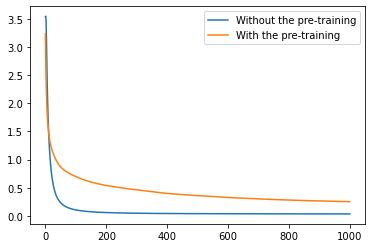

In [22]:
plt.plot(losses, label="Without the pre-training")
plt.plot(losses_p_b, label="With the pre-training")

plt.legend()
plt.show()